In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
import torch.optim as optim


Burda her resmin boyutu aynı değil. Bunlar aynı olmak zorunda. Çünkü model oluştururken aynı katmandan geçecekler.

In [2]:
transform = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [3]:
train_data= torchvision.datasets.Flowers102(
    root= "data_flower",
    split= "train",
    transform=transform,
    target_transform=None,
    download=True,
)

100%|██████████| 344862509/344862509 [00:11<00:00, 29497952.39it/s]


Extracting data_flower/flowers-102/102flowers.tgz to data_flower/flowers-102


100%|██████████| 502/502 [00:00<00:00, 639787.48it/s]


100%|██████████| 14989/14989 [00:00<00:00, 10657471.21it/s]


yukarda kiler sayesinde her image boyutu aynı oldu.

In [4]:
train_data[0][0].shape , train_data[1][0].shape , train_data[2][0].shape

(torch.Size([3, 48, 48]), torch.Size([3, 48, 48]), torch.Size([3, 48, 48]))

In [5]:
test_data= torchvision.datasets.Flowers102(
    root= "data_flower",
    split= "test",
    transform=transform,
    target_transform=None,
    download=True,
)

In [6]:
test_data[0][0].shape , test_data[1][0].shape , test_data[2][0].shape

(torch.Size([3, 48, 48]), torch.Size([3, 48, 48]), torch.Size([3, 48, 48]))

In [7]:
list(train_data)[0:3]

[(tensor([[[0.0667, 0.0588, 0.0627,  ..., 0.1333, 0.0902, 0.4000],
           [0.0510, 0.0549, 0.0745,  ..., 0.1176, 0.0980, 0.4392],
           [0.0588, 0.1059, 0.1216,  ..., 0.0863, 0.1098, 0.4588],
           ...,
           [0.0588, 0.0510, 0.0353,  ..., 0.5529, 0.5333, 0.5098],
           [0.0784, 0.0667, 0.0549,  ..., 0.5412, 0.5176, 0.4902],
           [0.1098, 0.1098, 0.0824,  ..., 0.5765, 0.5373, 0.4863]],
  
          [[0.1020, 0.0980, 0.1137,  ..., 0.1020, 0.1137, 0.2941],
           [0.0588, 0.0824, 0.1020,  ..., 0.1059, 0.1176, 0.3176],
           [0.0706, 0.1490, 0.1451,  ..., 0.1020, 0.1098, 0.3176],
           ...,
           [0.1020, 0.0863, 0.0392,  ..., 0.4980, 0.4510, 0.4196],
           [0.1333, 0.1020, 0.0824,  ..., 0.4824, 0.4471, 0.4118],
           [0.1922, 0.1569, 0.1333,  ..., 0.4471, 0.4314, 0.4078]],
  
          [[0.0353, 0.0431, 0.0510,  ..., 0.0941, 0.0667, 0.4039],
           [0.0235, 0.0431, 0.0667,  ..., 0.0784, 0.0745, 0.4431],
           [0.0431, 0.

In [8]:
#train_data.classes()ğ

In [9]:
len(train_data)

1020

In [10]:
image, label= train_data[0]

matplotlib yükseklik , genişlik ve kanal şeklinde aldıgı için permute ile o hale geitdim boyutları.

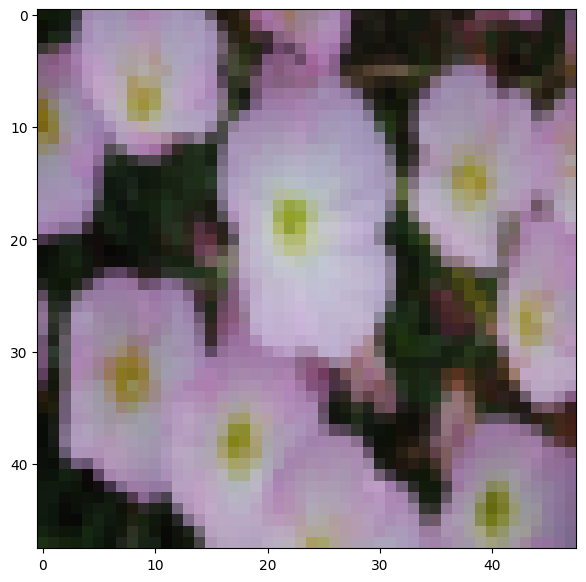

In [11]:
plt.figure(figsize=(7,7))
plt.imshow(image.permute(1, 2, 0).numpy())
plt.show()

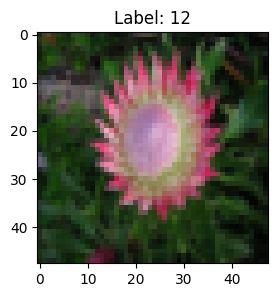

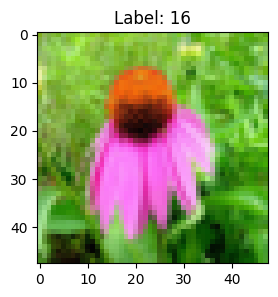

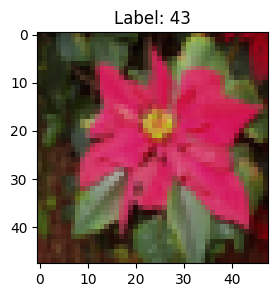

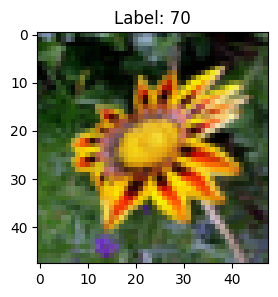

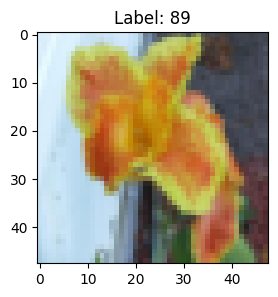

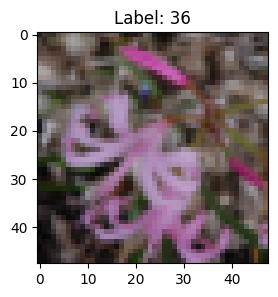

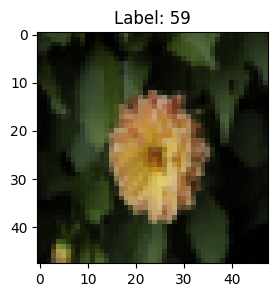

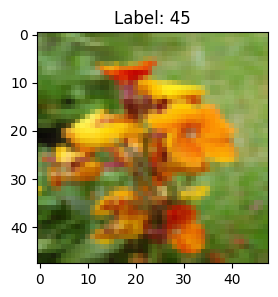

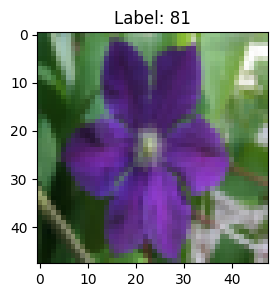

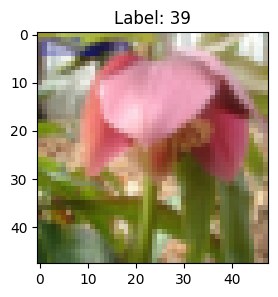

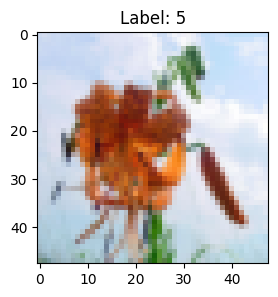

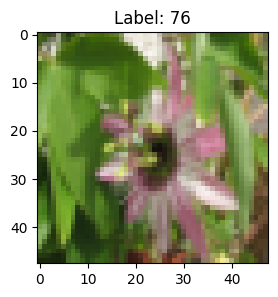

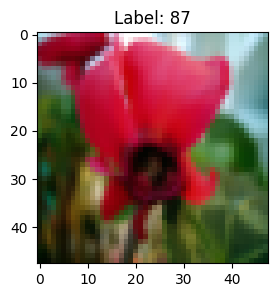

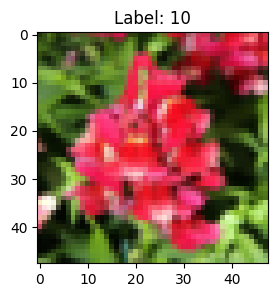

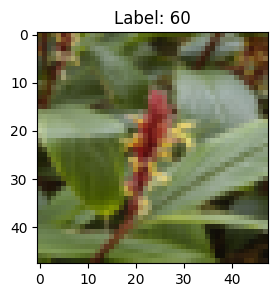

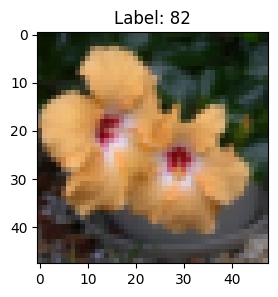

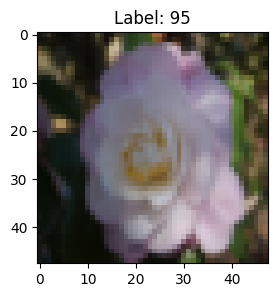

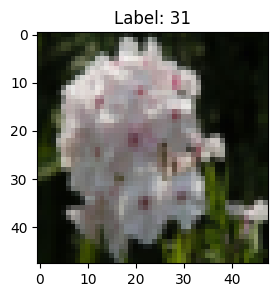

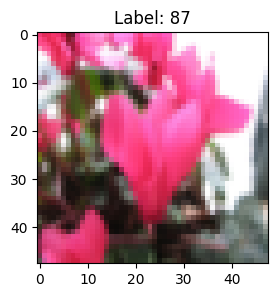

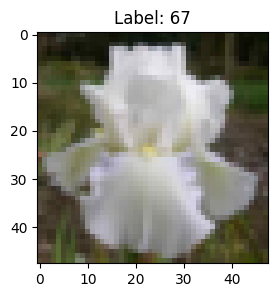

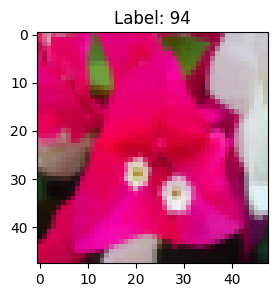

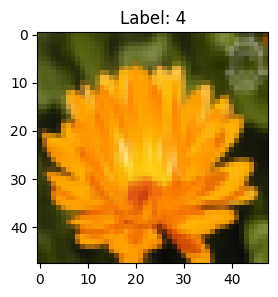

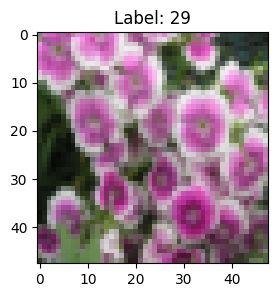

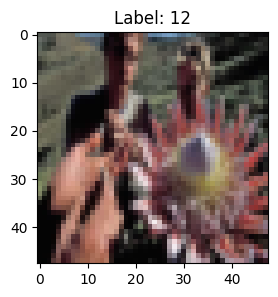

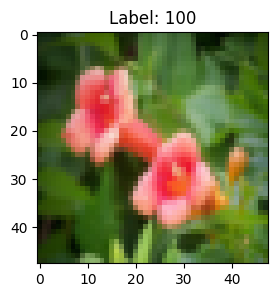

In [12]:
np.random.seed(seed=4)
rows=5
cols=5
for row in range(rows):
  for col in range(cols):
    image, label=train_data[int(np.random.randint(0,1019,size=1))]
    plt.figure(figsize=(3,3))
    plt.title(f"Label: {label}")
    plt.imshow(image.permute(1, 2, 0).numpy())
    plt.show()


In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [14]:
train_loader = DataLoader(train_data, shuffle=True, batch_size=32)
test_loader = DataLoader(train_data, shuffle=False, batch_size=32)
train_loader

In [15]:
class FlowerModel(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)


In [16]:
"""for batch,(X,y_label) in enumerate(train_loader):
  print(f"{batch},{X,y_label}")"""

'for batch,(X,y_label) in enumerate(train_loader):\n  print(f"{batch},{X,y_label}")'

In [ ]:
torch.manual_seed(42)

model0=FlowerModel(input_shape=48*48*3,hidden_units=15, output_shape=102)
model0.to(device)

epochs= 200
params= model0.parameters()

lossFn= nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params, lr=0.01)

train_loss= 0
test_loss= 0


for epoch in range(epochs):
  print(epoch)
  for batch, (X,y_label) in enumerate(train_loader):
    model0.train()
    X, y_label= X.to(device), y_label.to(device)
    train_pred= model0(X)
    loss=lossFn(train_pred,y_label)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



  model0.eval()
  with torch.inference_mode():
    for X, y_label in test_loader:
      X, y_label= X.to(device), y_label.to(device)
      test_pred=model0(X)
      loss=lossFn(test_pred,y_label)
      test_loss += loss
  if epoch%10==0:
    print(f"{epoch}.epoch >>> train loss= {train_loss}----test loss= {test_loss}")



0
0.epoch >>> train loss= 148.385498046875----test loss= 148.36582946777344
1
2
3
4
5
6
7
8
9
10
10.epoch >>> train loss= 1629.600830078125----test loss= 1628.7918701171875
11
